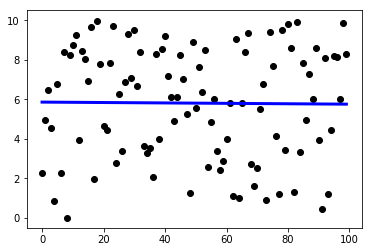

In [33]:
from random import *
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

### python list 활용 예제

length = 100
x = []
y = []

for i in range(length):
    x.append([i])
    y.append([np.random.rand()*10])
   
regr = linear_model.LinearRegression()
regr.fit(x,y)

plt.scatter(x,y,color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

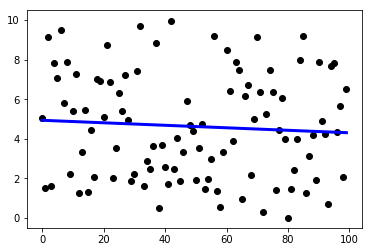

In [30]:
### numpy 활용 예제

length = 100
x = np.array(range(0,length)).reshape(length,1)
y = np.array([np.random.rand()*10 for i in range(length)]).reshape(length,1)
   
regr = linear_model.LinearRegression()
regr.fit(x,y)

plt.scatter(x,y,color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

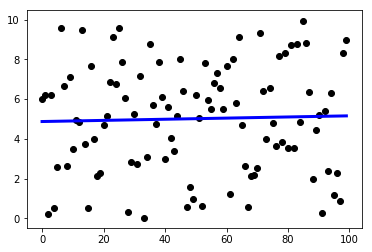

In [40]:
### pandas 활용 예제

length = 100
x = np.array(range(0,length)).reshape(length,1)
y = np.array([np.random.rand()*10 for i in range(length)]).reshape(length,1)

xy_data = np.concatenate((x,y), axis=1)
p_data = pd.DataFrame(xy_data, columns=('X','Y'))

x_regr = p_data.X.values.reshape(length,1)
y_regr = p_data.Y.values.reshape(length,1)

regr = linear_model.LinearRegression()
regr.fit(x_regr,y_regr)

plt.scatter(x_regr,y_regr,color='black')
plt.plot(x_regr, regr.predict(x_regr), color='blue', linewidth=3)
plt.show()

In [70]:
from sklearn import datasets, linear_model

diabetes = datasets.load_diabetes()

## 데이터를 2D로 분리
diabets_x = diabetes.data[:,np.newaxis,2]

## 전체 데이터를 Training과 Test로 분리
diabets_x_train = diabets_x[:-20]
diabets_x_test = diabets_x[-20:]

diabets_y_train = diabetes.target[:-20]
diabets_y_test = diabetes.target[-20:]

regr = linear_model.LinearRegression(copy_X=0)
regr.fit(diabets_x_train, diabets_y_train)

## 통계값을 확인 
print('Coefficient : ', regr.coef_)
print('Intercept : ', regr.intercept_)
print('MSE : ', np.mean((regr.predict(diabets_x_test) - diabets_y_test)**2))
print('Variance : ', regr.score(diabets_x_test, diabets_y_test))



Coefficient :  [938.23786125]
Intercept :  152.91886182616167
MSE :  2548.0723987259707
Variance :  0.4725754479822712


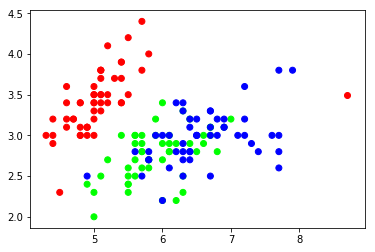

In [89]:
#### KNN

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target
h = .02
 
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

#plt.scatter(x[:,0],x[:,1], c=y, cmap=cmap_light)
plt.scatter(x[:,0],x[:,1], c=y, cmap=cmap_bold) ### c=y 조건에 의해 Category가 결정됨

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(x,y)

##새로운 포인트를 넣었을때, 어떤 class로 예측하는지 확인
new_point = np.array([[8.7,3.5]])
iris_class = clf.predict(new_point)
iris_class
